# Price Prediction on Laptops using Machine Learning

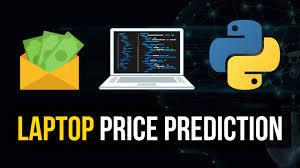

# Introduction

#### This project shows a Laptop price prediction system by using the **supervised machine learning technique**. The research uses random decision forest as the machine learning prediction method which offered **99.33%** prediction precision.

#### Using random decision forest, there are multiple independent variables but one and only one dependent variable whose actual and predicted values are compared to find precision of results.

#### This project proposes a system where price is dependent variable which is predicted, and this price is derived from factors like Laptop’s model, RAM, ROM (HDD/SSD), GPU, CPU, IPS Display, and Touch Screen.

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **Data Exploration and Understanding:**

# Loading the data

In [ ]:
df=pd.read_csv("/content/laptop.csv")
df.head(2)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [ ]:
df.shape  #There are 1303 rows and 13 columns in the dataset given

(1303, 13)

# Data Cleaning

In [ ]:
df.isnull().sum()  # There is equal number of null values in all the columns - indicates empty rows in the data

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [ ]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


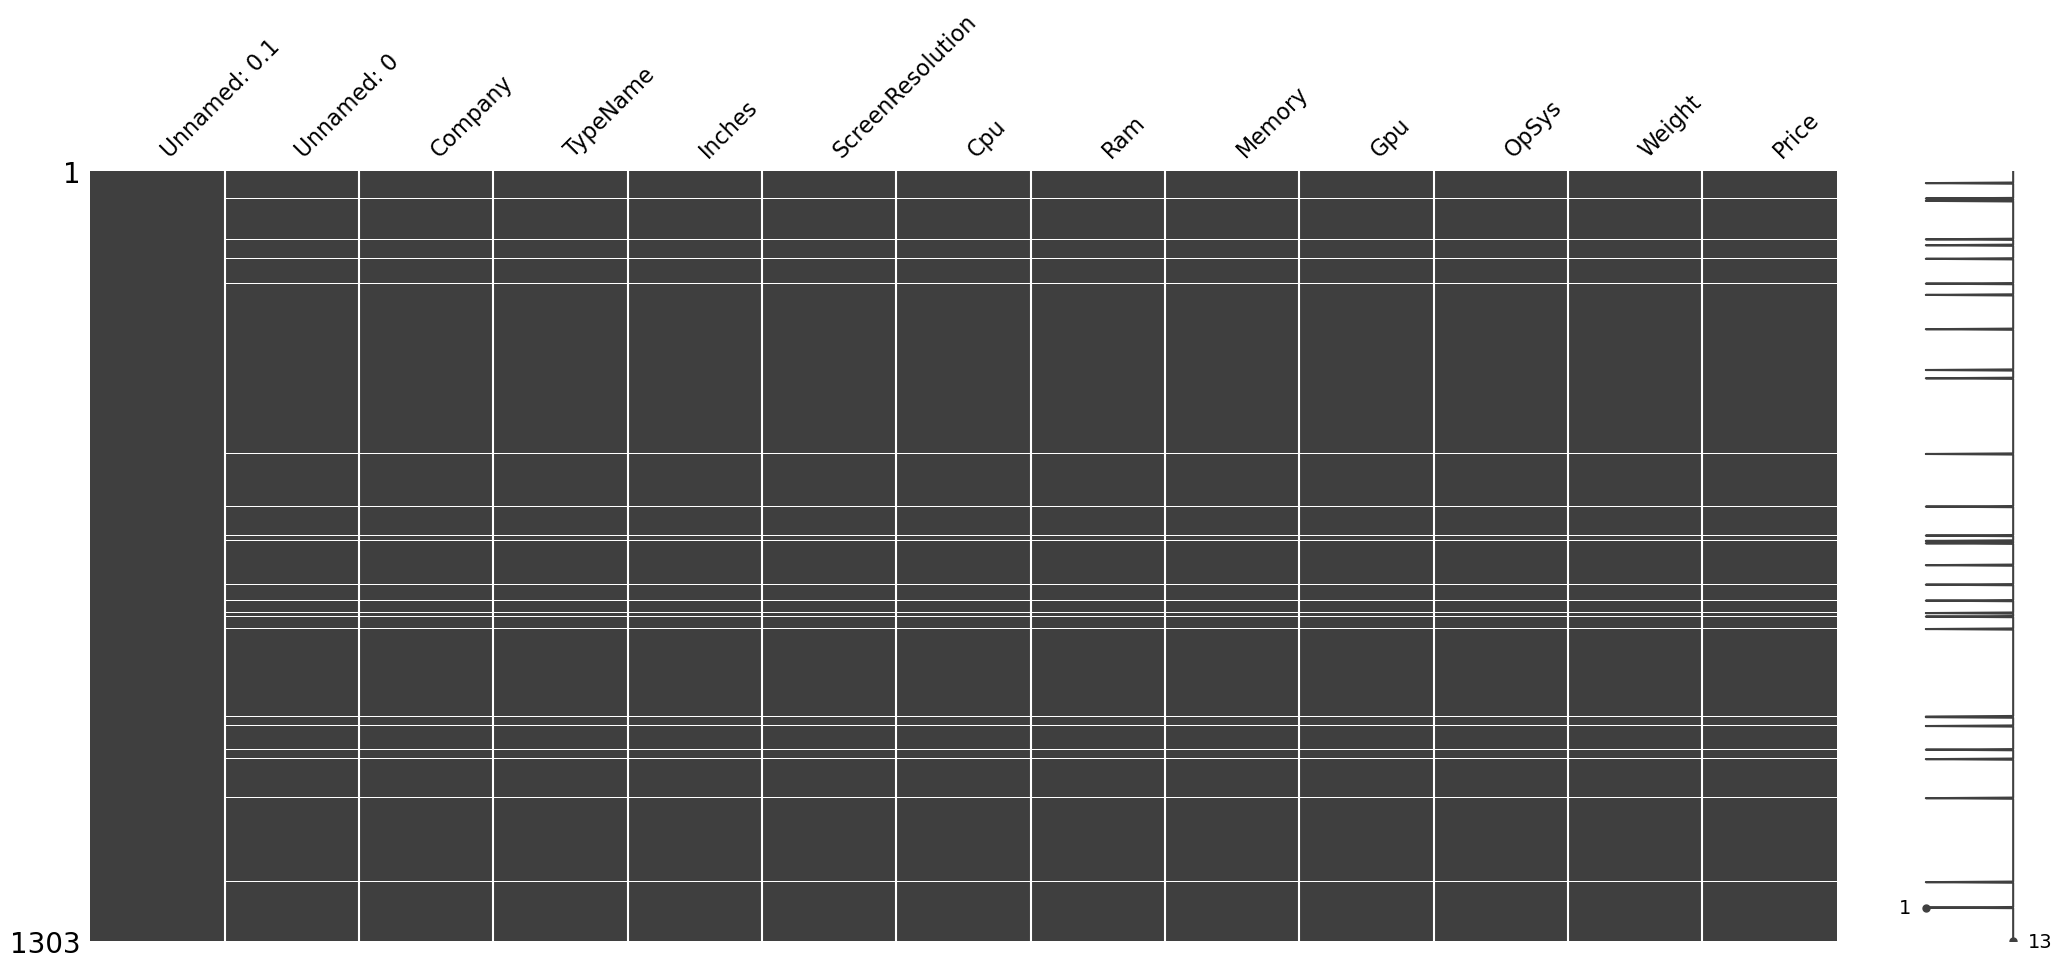

In [ ]:
import missingno as msno
msno.matrix(df);

#### So we can see that there is column named "Unnamed: 0.1" & "Unnamed: 0", which is a unnecessary data for this project. So we can safely drop the column from the dataset.

In [ ]:
# filter out the empty rows using dropna method
df_filtered = df.dropna()
df_filtered.head(2)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [ ]:
df_filtered.drop(columns=["Unnamed: 0.1","Unnamed: 0"], inplace=True)

In [ ]:
df_filtered.shape      #There are 1273 rows and 13 columns   - 30 empty rows dropped

(1273, 11)

In [ ]:
df_filtered.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [ ]:
df_filtered.isnull().sum()  #We can observe that there is no null values in the dataset

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 119.3+ KB


In [ ]:
df_filtered.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


#### Next, from the info we got from dataset, we can separate them as numrical values and categorical values to show the difference which features we will use for the analysis. Understanding this will help us in analysing the data more efficientl

In [ ]:
# Separating categorical and numerical values
catvars = df_filtered.select_dtypes(include=['object']).columns
numvars = df_filtered.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
        'Memory', 'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Price'], dtype='object'))

#### Now, we are trying to get info of all the columns of the datasets. And also to check how many number of values are present in each column

In [ ]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df_filtered[col].unique()}')

def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df_filtered[col].value_counts()}')

# Calling uniquevals function
for col in df_filtered.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Gaming' '2 in 1 Convertible' 'Workstation'
 'Netbook']
---------------------------------------------------------------------------
Details of the particular col Inches is : ['13.3' '15.6' '15.4' '14' '12' '17.3' '13.5' '12.5' '13' '18.4' '13.9'
 '11.6' '25.6' '35.6' '12.3' '27.3' '24' '33.5' '?' '31.6' '17' '15'
 '14.1' '11.3' '10.1']
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'


# Inches, Memory and Weight columns contain '?'

In [ ]:
df_filtered=df_filtered[~(df_filtered=="?").any(axis=1)]

In [ ]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df_filtered[col].unique()}')

def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df_filtered[col].value_counts()}')

# Calling uniquevals function
for col in df_filtered.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Gaming' '2 in 1 Convertible' 'Workstation'
 'Netbook']
---------------------------------------------------------------------------
Details of the particular col Inches is : ['13.3' '15.6' '15.4' '14' '12' '17.3' '13.5' '12.5' '13' '18.4' '13.9'
 '11.6' '25.6' '35.6' '12.3' '27.3' '24' '33.5' '31.6' '17' '15' '14.1'
 '11.3' '10.1']
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IP

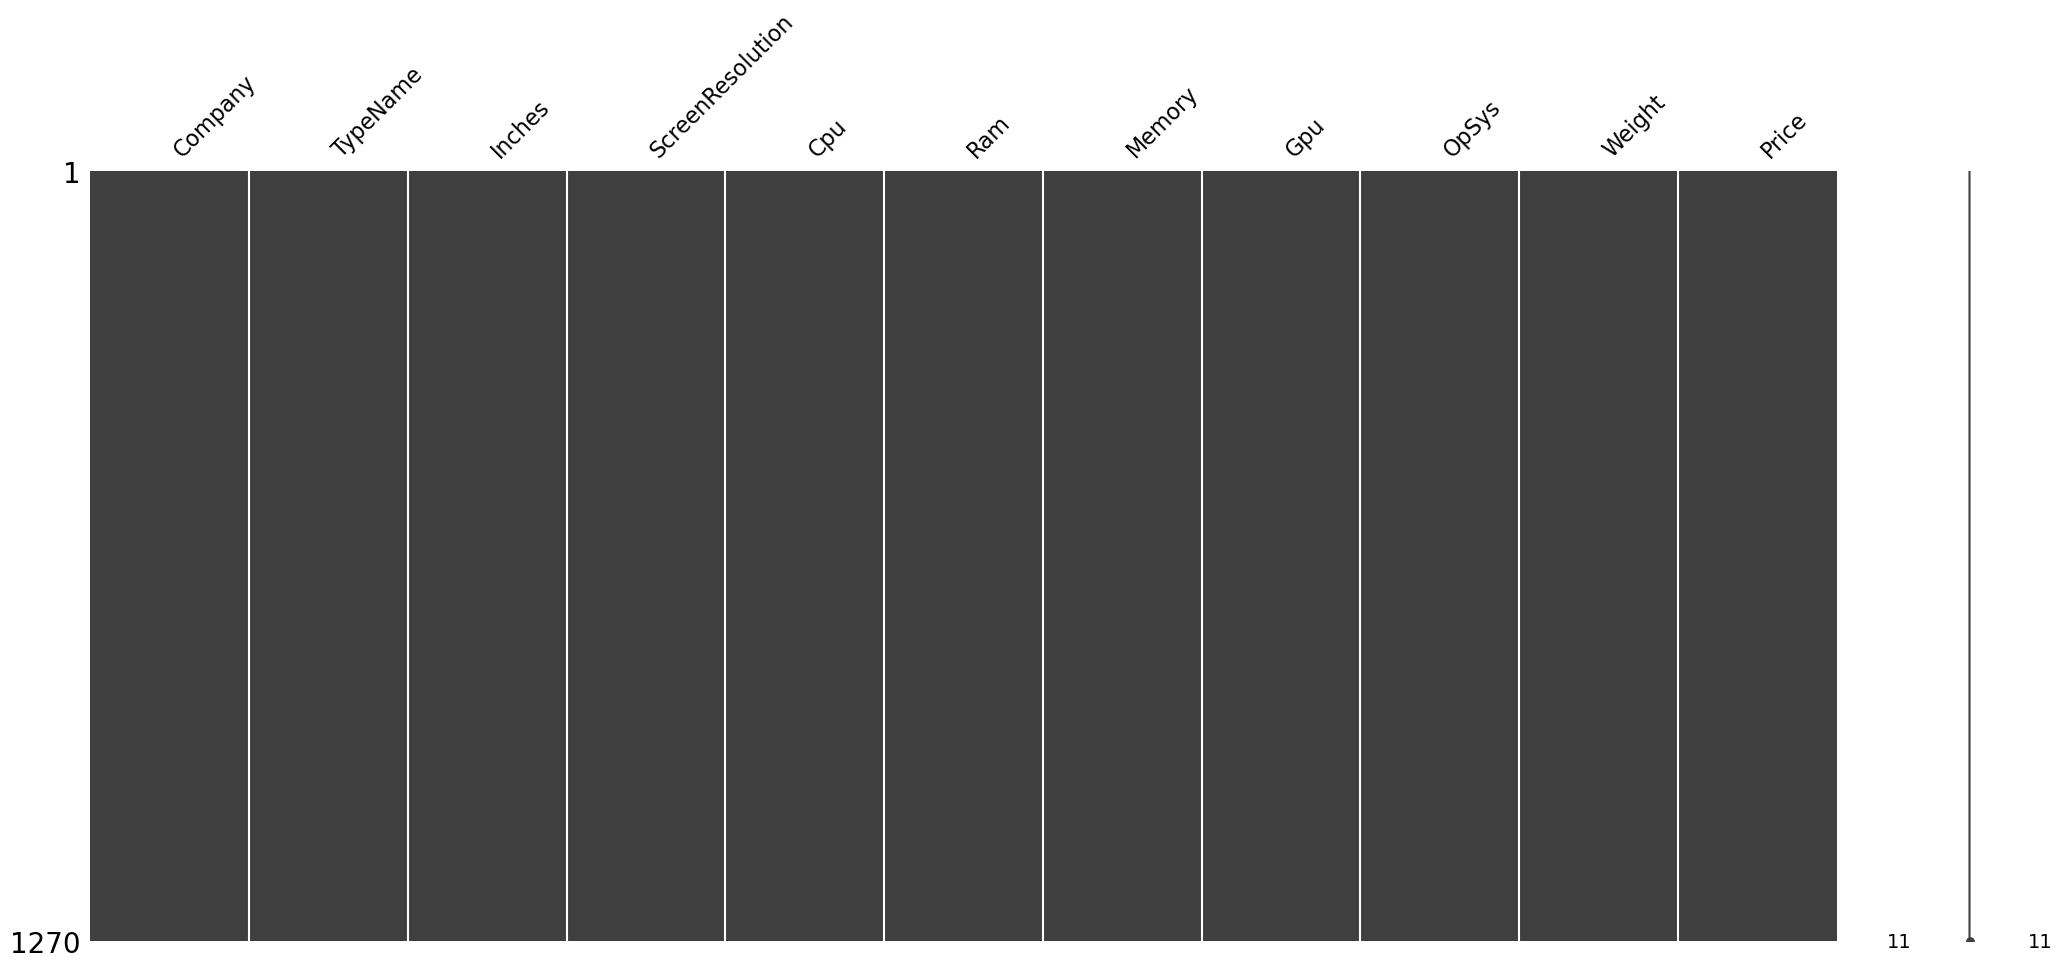

In [ ]:
msno.matrix(df_filtered);

#### So on observation we can see that if we remove "GB" from RAM,i can make it as an integer value then after,now same goes with Memory as well as Weight,for Weight i can classify it as floating variable using the str.replace() as shown ↓

In [ ]:
df_filtered['Ram'] = df_filtered['Ram'].str.replace('GB','')
df_filtered['Weight'] = df_filtered['Weight'].str.replace('kg','')

In [ ]:
# converting from string->integer for ram column

df_filtered['Ram'] = df_filtered['Ram'].astype('int32')

# converting from string-> float for the weight column

df_filtered['Weight'] = df_filtered['Weight'].astype('float32')

# converting from string-> float for the Inches	 column

df_filtered['Inches'] = df_filtered['Inches'].astype('float32')

df_filtered.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
df1=df_filtered.copy()

# **Detecting Outliers using boxplot**

<Axes: ylabel='Weight'>

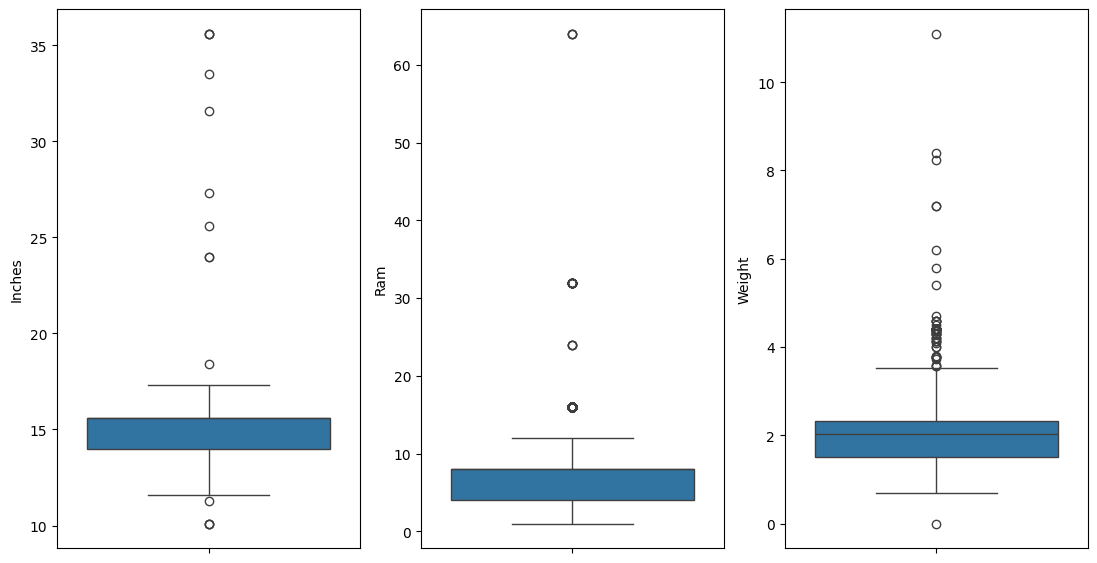

In [ ]:
#check outliers for Inches,Ram,Weight
plt.figure(figsize=(18,7))
plt.subplot(1,4,1)
sns.boxplot(df1["Inches"])  # Outliers - median
plt.subplot(1,4,2)
sns.boxplot(df1["Ram"])     # Outliers - median
plt.subplot(1,4,3)
sns.boxplot(df1["Weight"])  # Outliers - median

# **Handling missing values - Imputing with median because its has outliers**

In [ ]:
#To fill the missing values and assign back to original column
df1["Inches"]=df_filtered["Inches"].fillna(df_filtered["Inches"].median())
df1["Ram"]=df_filtered["Ram"].fillna(df_filtered["Ram"].median())
df1["Weight"]=df_filtered["Weight"].fillna(df_filtered["Weight"].median())

# **IQR(Inter Quantile Range) = Q3 - Q1 (50% of the data)**





In [ ]:
Q1=df1['Inches'].quantile(0.25)
Q2=df1['Inches'].quantile(0.5)
Q3=df1['Inches'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print('Inches')
print('Inches_lower_limit:', lowlim)
print('Inches_upper_limit:', upplim)
Q1=df1['Ram'].quantile(0.25)
Q2=df1['Ram'].quantile(0.5)
Q3=df1['Ram'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print('Ram')
print('Ram_lower_limit:', lowlim)
print('Ram_upper_limit:', upplim)
Q1=df1['Weight'].quantile(0.25)
Q2=df1['Weight'].quantile(0.5)
Q3=df1['Weight'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print('Weight')
print('Weight_lower_limit:', lowlim)
print('Weight_upper_limit:', upplim)

Inches
Inches_lower_limit: 11.59999942779541
Inches_upper_limit: 18.000000953674316
Ram
Ram_lower_limit: -2.0
Ram_upper_limit: 14.0
Weight
Weight_lower_limit: 0.2700001001358032
Weight_upper_limit: 3.5499998331069946


In [ ]:
pip install feature_engine

# **Treating outliers with capping technique**
# - by giving limit i.e., capping with lower limit and upper limit values

<Axes: ylabel='Weight'>

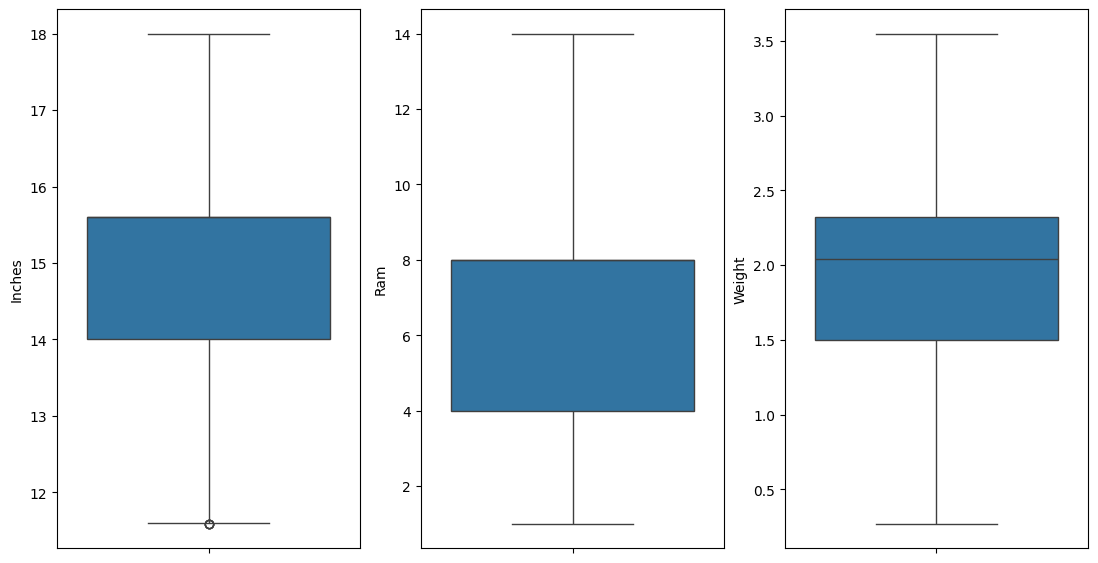

In [ ]:
from feature_engine.outliers import ArbitraryOutlierCapper

plt.figure(figsize=(18,7))
plt.subplot(1,4,1)
arb=ArbitraryOutlierCapper(min_capping_dict={'Inches':11.59},max_capping_dict={'Inches':18.00})
df1[['Inches']]=arb.fit_transform(df1[['Inches']])
sns.boxplot(df1['Inches'])
plt.subplot(1,4,2)
arb=ArbitraryOutlierCapper(min_capping_dict={'Ram':-2.0},max_capping_dict={'Ram':14.0})
df1[['Ram']]=arb.fit_transform(df1[['Ram']])
sns.boxplot(df1['Ram'])
plt.subplot(1,4,3)
arb=ArbitraryOutlierCapper(min_capping_dict={'Weight':0.2700001001358032},max_capping_dict={'Weight':3.549})
df1[['Weight']]=arb.fit_transform(df1[['Weight']])
sns.boxplot(df1['Weight'])

# Exploratory Data Analysis

# Price Distribution plot

<Axes: xlabel='Price', ylabel='Density'>

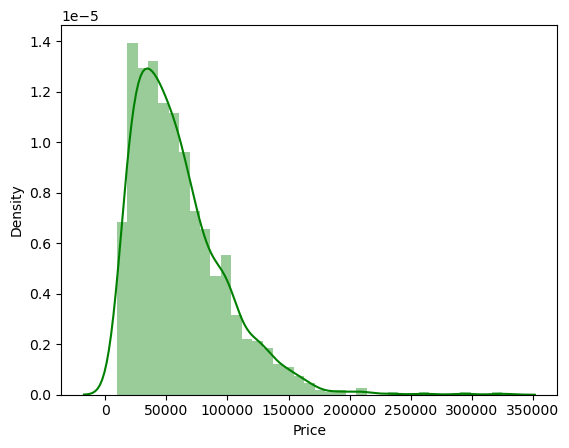

In [ ]:
sns.distplot(df1['Price'],color='green')  #It is positively skewed or right skewed

# **Countplot for Categorical variables**

[Text(0, 0, '1044'),
 Text(0, 0, '63'),
 Text(0, 0, '61'),
 Text(0, 0, '45'),
 Text(0, 0, '27'),
 Text(0, 0, '13'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '1')]

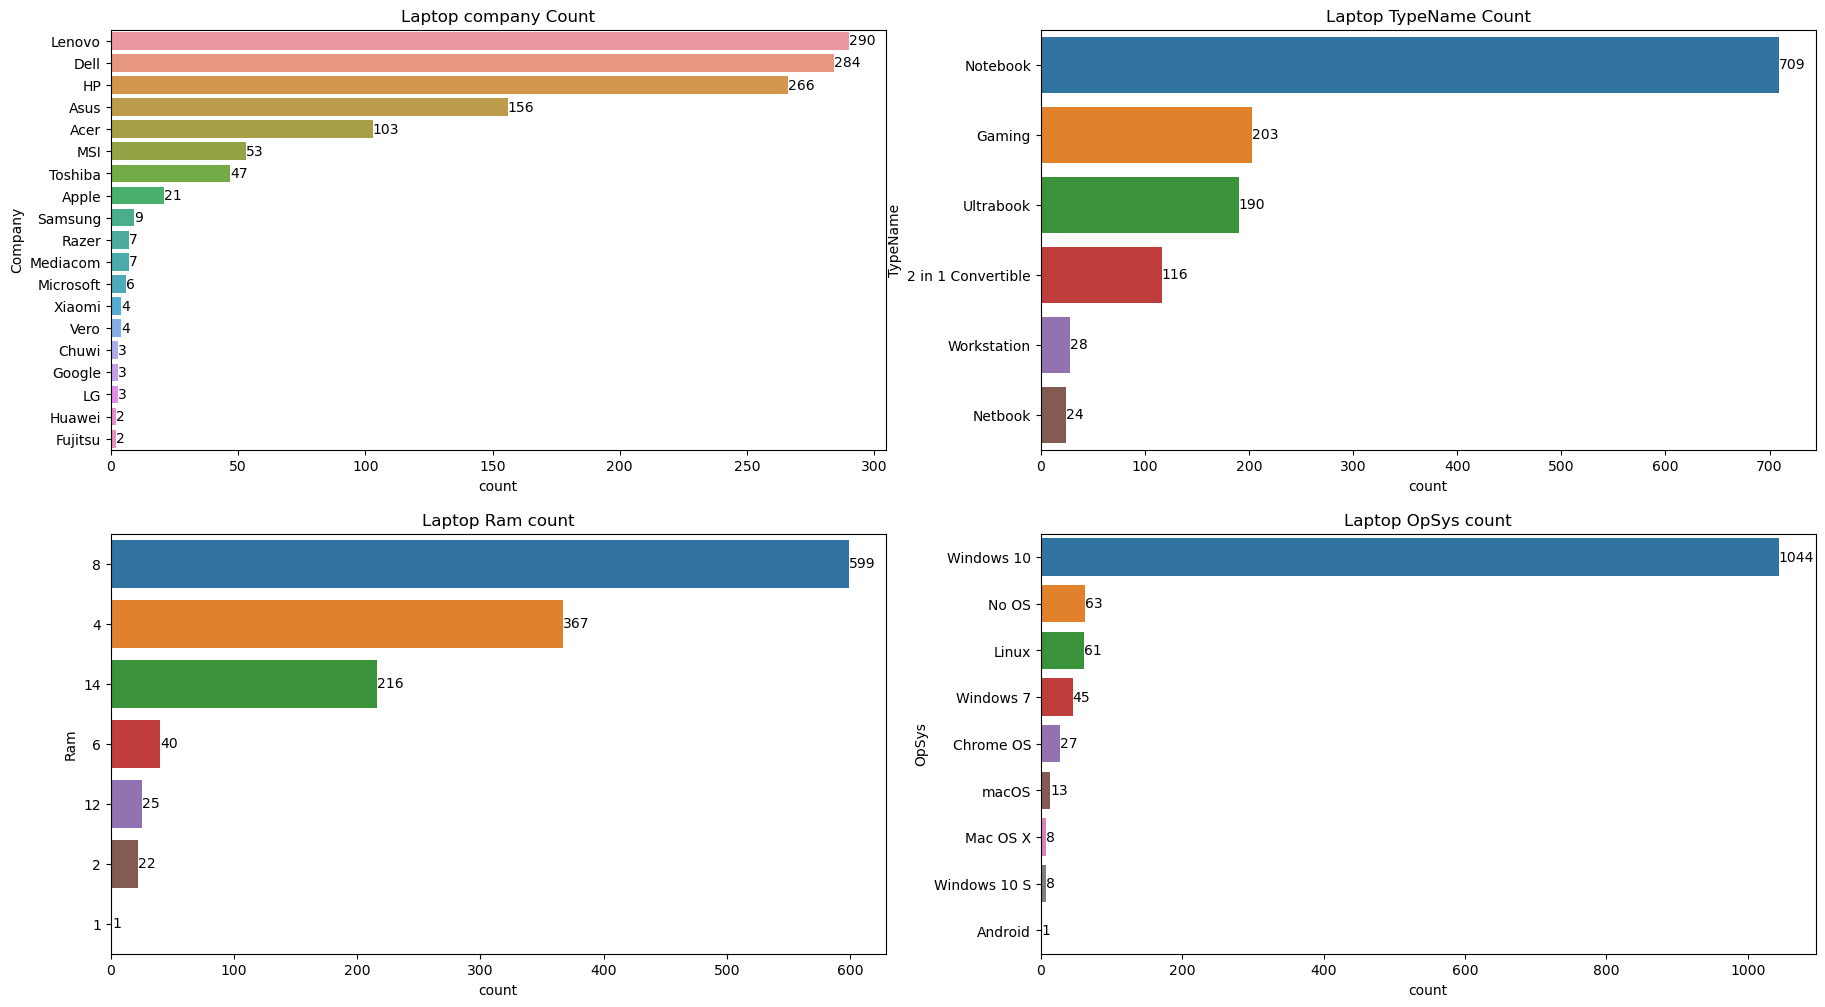

In [ ]:
plt.figure(figsize=(22,12))
plt.subplot(2,2,1)
plt.title('Laptop company Count')
ax=sns.countplot(y ='Company', data = df1, order = df1['Company'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.subplot(2,2,2)
plt.title('Laptop TypeName Count')
ax=sns.countplot(y ='TypeName', data = df1, order = df1['TypeName'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.subplot(2,2,3)
plt.title('Laptop Ram count')
ax=sns.countplot(y ='Ram', data = df1, order = df1['Ram'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.subplot(2,2,4)
plt.title('Laptop OpSys count')
ax=sns.countplot(y ='OpSys', data = df1, order = df1['OpSys'].value_counts().index)
ax.bar_label(ax.containers[0])

# **Barplot - Average price for each Laptop brands**

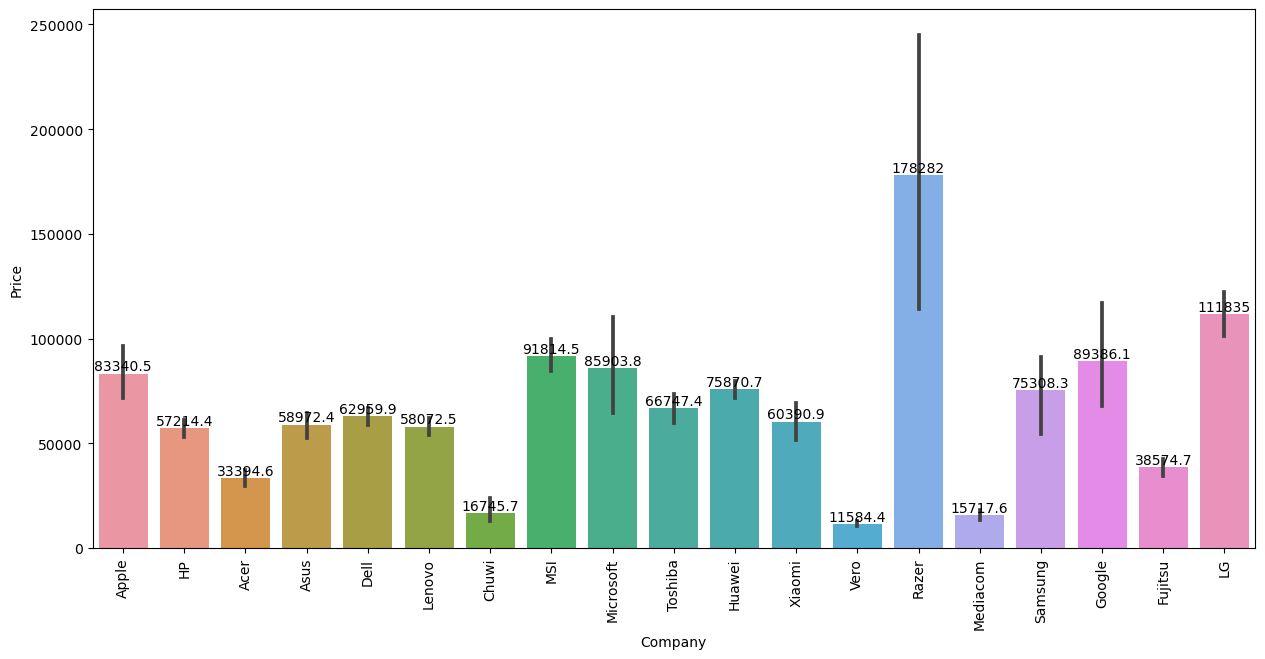

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.barplot(x = df1['Company'],y = df1['Price'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 'vertical')
plt.show()

# **Barplot - Price variation on each Laptop type**

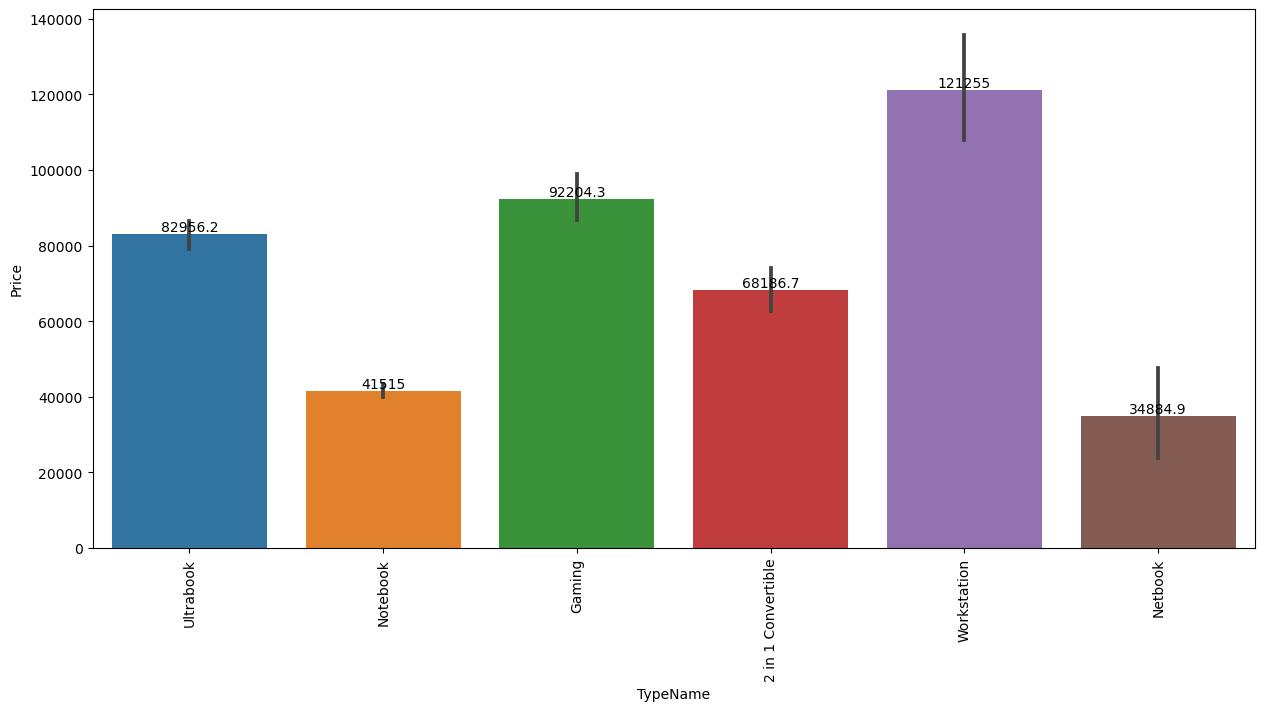

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.barplot(x = df1['TypeName'],y = df1['Price'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 'vertical')
plt.show()

# **Scatterplot - Price variation for different inches of laptops**

<Axes: xlabel='Inches', ylabel='Price'>

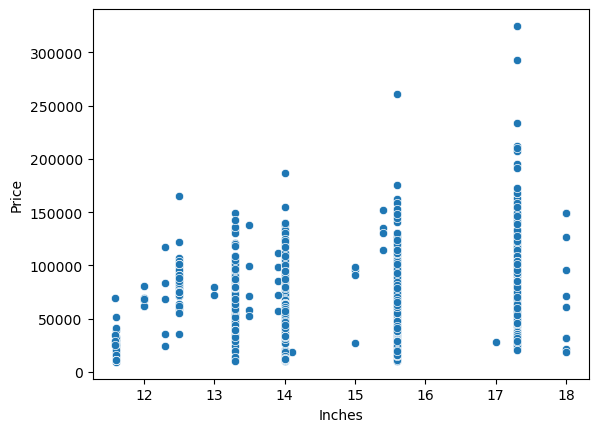

In [ ]:
sns.scatterplot(x = df1['Inches'],y = df1['Price'])

# **Screen Resolution feature analysis**

#### For the Screen Resolution column we have many types of Screen Resolutions out there as shown Touch Screen and Normal and IPS Panel are the 3 parts on basis of which we can segregate the things

In [ ]:
df1['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                492
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

# Creating new column - Touchscreen

In [ ]:
df1['TouchScreen'] = df1['ScreenResolution'].apply(lambda element:1 if 'Touchscreen' in element else 0)
df1.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
400,Lenovo,Notebook,15.600000,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.200,16303.6800,0
1297,Asus,Notebook,15.600000,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.200,38378.6496,0
659,Dell,Gaming,17.299999,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,14,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.549,167691.8736,0
989,Dell,Notebook,14.000000,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.600,59620.3200,0
959,Acer,2 in 1 Convertible,11.600000,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.250,20725.9200,1
667,HP,Notebook,15.600000,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon 530,Windows 10,2.100,39693.6000,0
1186,Dell,2 in 1 Convertible,15.600000,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,14,512GB SSD,Intel HD Graphics 620,Windows 10,2.090,62817.1200,1
36,Acer,Notebook,15.600000,1366x768,Intel Core i3 7130U 2.7GHz,4,1TB HDD,Intel HD Graphics 620,Linux,2.100,19553.7600,0
499,Lenovo,Notebook,15.600000,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.300,48538.0800,0
232,Lenovo,Gaming,15.600000,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,14,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.200,79866.7200,0


#### In this column '0' represents not a touch screen latop and '1' represents its a touch screen laptop

# Countplot for Touchscreen laptops &
# Barplot - Price variation on Touch screen laptops

[Text(0, 0, '56957.9'), Text(0, 0, '77059.5')]

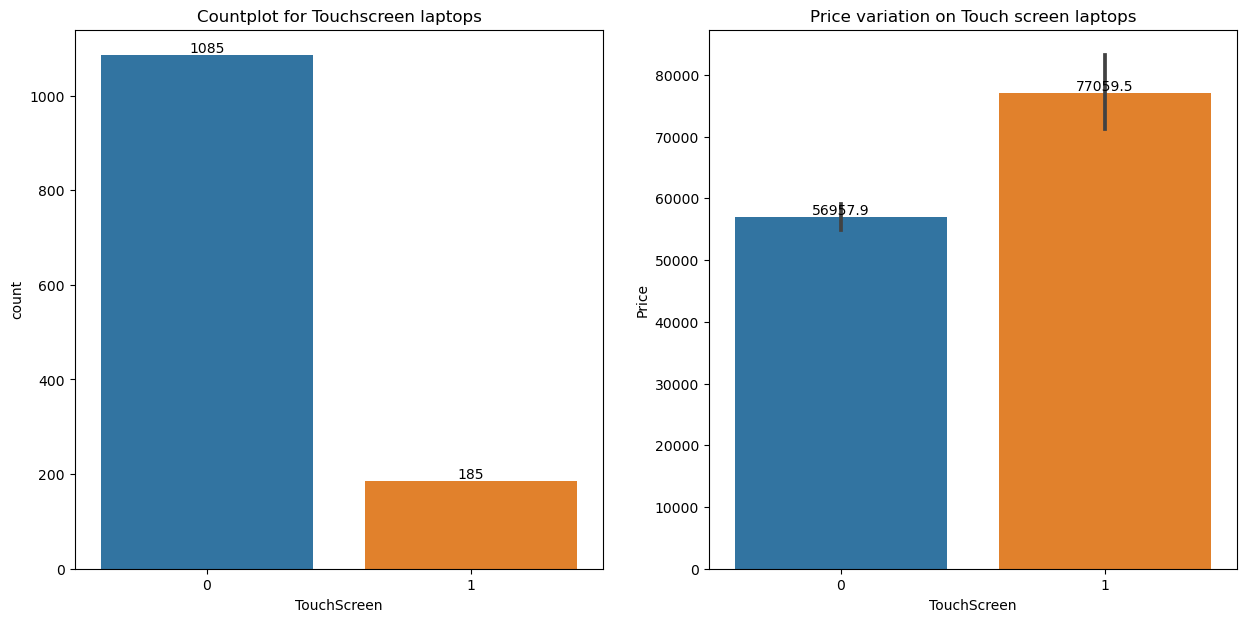

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Countplot for Touchscreen laptops')
ax=sns.countplot(x ='TouchScreen', data = df1, order = df1['TouchScreen'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.subplot(1,2,2)
plt.title('Price variation on Touch screen laptops')
ax=sns.barplot(x = df1['TouchScreen'],y = df1['Price'])
ax.bar_label(ax.containers[0])

#### In ScreenResolution column '0' represents not a touch screen latop and '1' represents its a touch screen laptop

# Creating new column - IPS

In [ ]:
df1['IPS'] = df1['ScreenResolution'].apply(lambda element:1 if "IPS" in element else 0)
df1.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
1012,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.48,84715.200,0,0
655,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,500GB HDD,Intel HD Graphics 620,Windows 10,2.00,56689.920,0,1
706,Acer,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,1,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,53226.720,1,1
757,HP,Workstation,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia Quadro M1000M,Windows 7,2.59,83170.080,0,0
820,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,26101.872,0,0


# **Countplot for IPS laptops**
# Barplot - Price variation with respect to IPS laptops

[Text(0, 0, '53878.6'), Text(0, 0, '75130.7')]

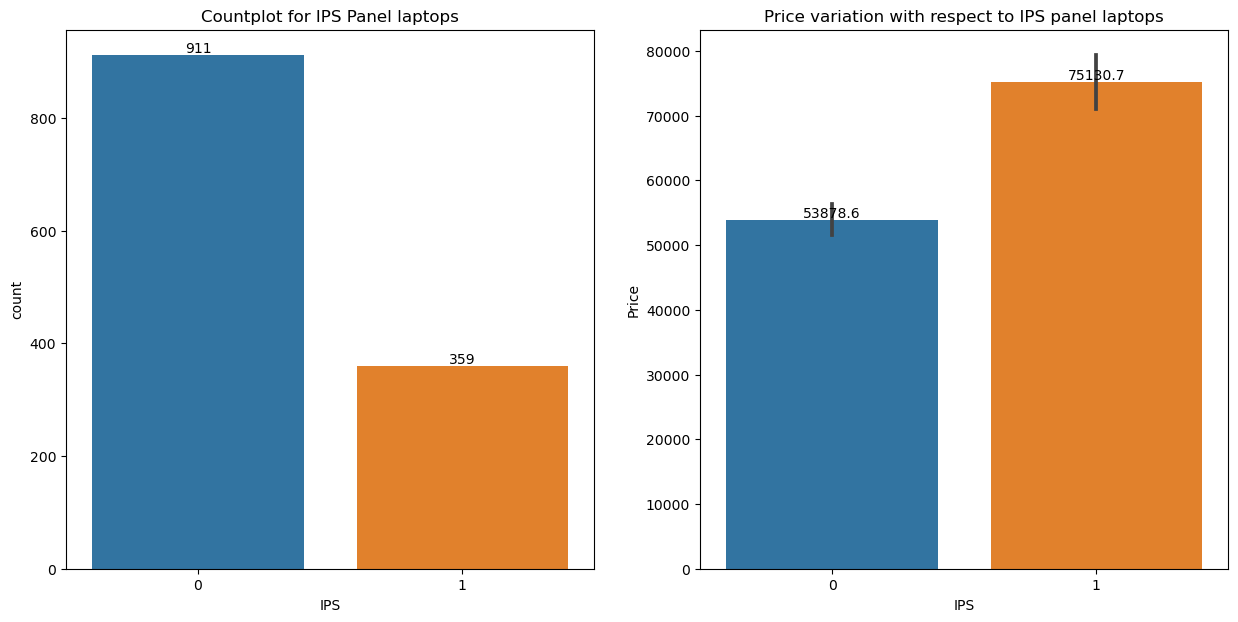

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Countplot for IPS Panel laptops')
ax=sns.countplot(x ='IPS', data = df1, order = df1['IPS'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.subplot(1,2,2)
plt.title('Price variation with respect to IPS panel laptops')
ax=sns.barplot(x = df1['IPS'],y = df1['Price'])
ax.bar_label(ax.containers[0])

#### In screen resolution column - in IPS Panel  '0' represents NON-touch screen latop and '1' represents its a touch screen laptop

# Feature Engineering

### Extracting the X Resolution and the Y Resolution

#### Now both the dimension are present at end of a string and separated with a cross sign. So first we will split the string with space and access the last string from the list. then split the string with a cross sign and access the zero and first index for X and Y-axis dimensions.

In [ ]:
def findXresolution(s):
  return s.split()[-1].split("x")[0]
def findYresolution(s):
  return s.split()[-1].split("x")[1]
#finding the x_res and y_res from screen resolution
df1['X_res'] = df1['ScreenResolution'].apply(lambda x: findXresolution(x))
df1['Y_res'] = df1['ScreenResolution'].apply(lambda y: findYresolution(y))
#convert to numeric
df1['X_res'] = df1['X_res'].astype('int')
df1['Y_res'] = df1['Y_res'].astype('int')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1270 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1270 non-null   object 
 1   TypeName          1270 non-null   object 
 2   Inches            1270 non-null   float64
 3   ScreenResolution  1270 non-null   object 
 4   Cpu               1270 non-null   object 
 5   Ram               1270 non-null   int32  
 6   Memory            1270 non-null   object 
 7   Gpu               1270 non-null   object 
 8   OpSys             1270 non-null   object 
 9   Weight            1270 non-null   float64
 10  Price             1270 non-null   float64
 11  TouchScreen       1270 non-null   int64  
 12  IPS               1270 non-null   int64  
 13  X_res             1270 non-null   int64  
 14  Y_res             1270 non-null   int64  
dtypes: float64(3), int32(1), int64(4), object(7)
memory usage: 153.8+ KB


In [ ]:
df1.corr(numeric_only=True)

,Inches,Ram,Weight,Price,TouchScreen,IPS,X_res,Y_res
Inches,1.000000,0.194732,0.824865,0.065046,-0.341036,-0.115884,-0.072116,-0.092975
Ram,0.194732,1.000000,0.264144,0.717141,0.129573,0.232792,0.473127,0.465426
Weight,0.824865,0.264144,1.000000,0.151431,-0.304372,-0.023111,-0.062997,-0.084788
Price,0.065046,0.717141,0.151431,1.000000,0.190070,0.256502,0.558245,0.554788
TouchScreen,-0.341036,0.129573,-0.304372,0.190070,1.000000,0.152195,0.344205,0.350777
IPS,-0.115884,0.232792,-0.023111,0.256502,0.152195,1.000000,0.288156,0.295117
X_res,-0.072116,0.473127,-0.062997,0.558245,0.344205,0.288156,1.000000,0.994149
Y_res,-0.092975,0.465426,-0.084788,0.554788,0.350777,0.295117,0.994149,1.000000


# **Heatmap - Correlation between all features**
# **correlation** - To find the association between numerical variables

<Axes: >

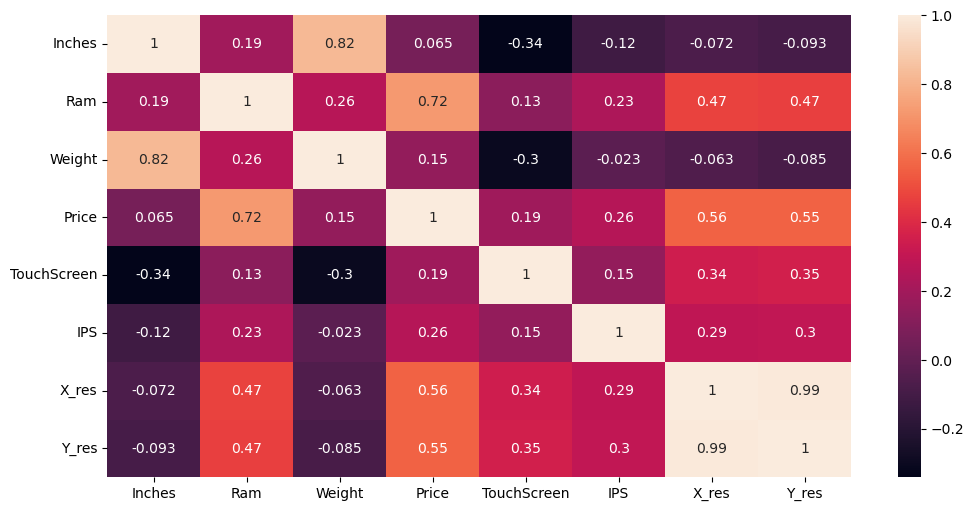

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(numeric_only=True),annot=True)

# Replacing inches, X and Y resolution to PPI

#### To find the correlation of columns with price using the corr method then we can see that inches do not have a strong correlation but X and Y-axis resolution have a very strong resolution so we can take advantage of it and convert these three columns to a single column that is known as Pixel per inches(PPI). In the end, our goal is to improve the performance by having fewer features.

![pixel-density.png](attachment:pixel-density.png)

![pixels.png](attachment:pixels.png)

In [ ]:
df1['ppi'] = (((df1['X_res']**2) + (df1['Y_res']**2))**0.5/df1['Inches']).astype('float')
df1.corr(numeric_only=True)['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.717141
X_res          0.558245
Y_res          0.554788
ppi            0.477386
IPS            0.256502
TouchScreen    0.190070
Weight         0.151431
Inches         0.065046
Name: Price, dtype: float64

### Now we can see the correlation of price then PPI is having a strong correlation.

### So now we can drop the extra columns which are not of use. At this point, we have started keeping the important columns in our dataset.

In [ ]:
df1.drop(columns = ['ScreenResolution', 'Inches','X_res','Y_res'], inplace=True)

In [ ]:
df1.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938


# **CPU column**

In [ ]:
df1['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    141
Intel Core i7 7500U 2.7GHz     127
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

#### If you observe the CPU column then it also contains lots of information. If you again use a unique function or value counts function on the CPU column then we have 118 different categories. The information it gives is about preprocessors in laptops and speed.

In [ ]:
#first we will extract Name of CPU which is first 3 words from Cpu column and then we will check which processor it is
def fetch_processor(x):
  cpu_name = " ".join(x.split()[0:3])
  if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
    return cpu_name
  elif cpu_name.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'
df1['cpu_name'] = df1['Cpu'].apply(lambda x: fetch_processor(x))
df1.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,14,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5


#### To extract the preprocessor we need to extract the first three words from the string. we are having an Intel preprocessor and AMD preprocessor so we are keeping 5 categories in our dataset as i3, i5, i7, other intel processors, and AMD processors.

# Countplot for number of CPUs
# Barplot - Price vs CPU variation

[Text(0, 0, '54230.5'),
 Text(0, 0, '85122.2'),
 Text(0, 0, '29954'),
 Text(0, 0, '28927.5'),
 Text(0, 0, '29634.8')]

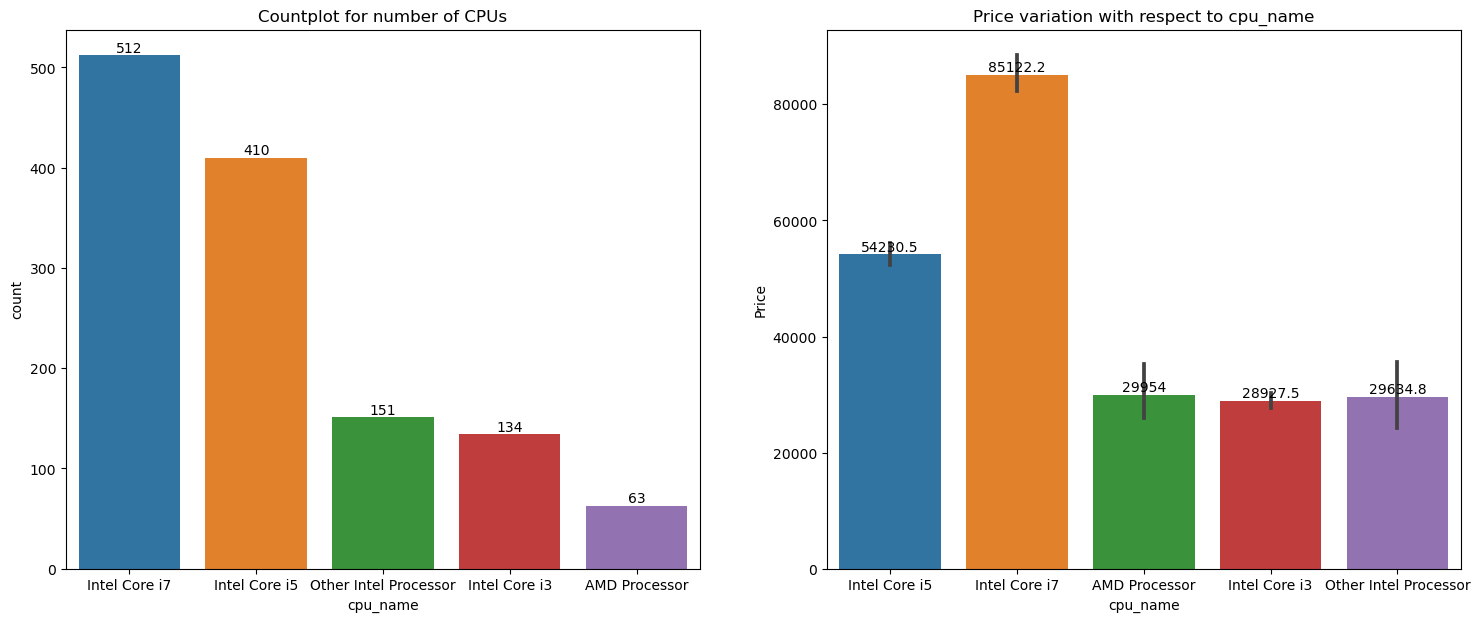

In [ ]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.title('Countplot for number of CPUs')
ax=sns.countplot(x ='cpu_name', data = df1, order = df1['cpu_name'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.subplot(1,2,2)
plt.title('Price variation with respect to cpu_name')
ax=sns.barplot(x = df1['cpu_name'],y = df1['Price'])
ax.bar_label(ax.containers[0])

#### We can safely drop the old CPU column from the dataset

In [ ]:
df1.drop(columns=['Cpu'],inplace=True)
df1.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,cpu_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5


# Analysis on the RAM column
# Barplot - Price vs RAM

[Text(0, 0, '53226.7'),
 Text(0, 0, '14756.7'),
 Text(0, 0, '30552.9'),
 Text(0, 0, '32826.4'),
 Text(0, 0, '63028.6'),
 Text(0, 0, '66037.3'),
 Text(0, 0, '103367'),
 Text(0, 0, '117553'),
 Text(0, 0, '181849'),
 Text(0, 0, '117512')]

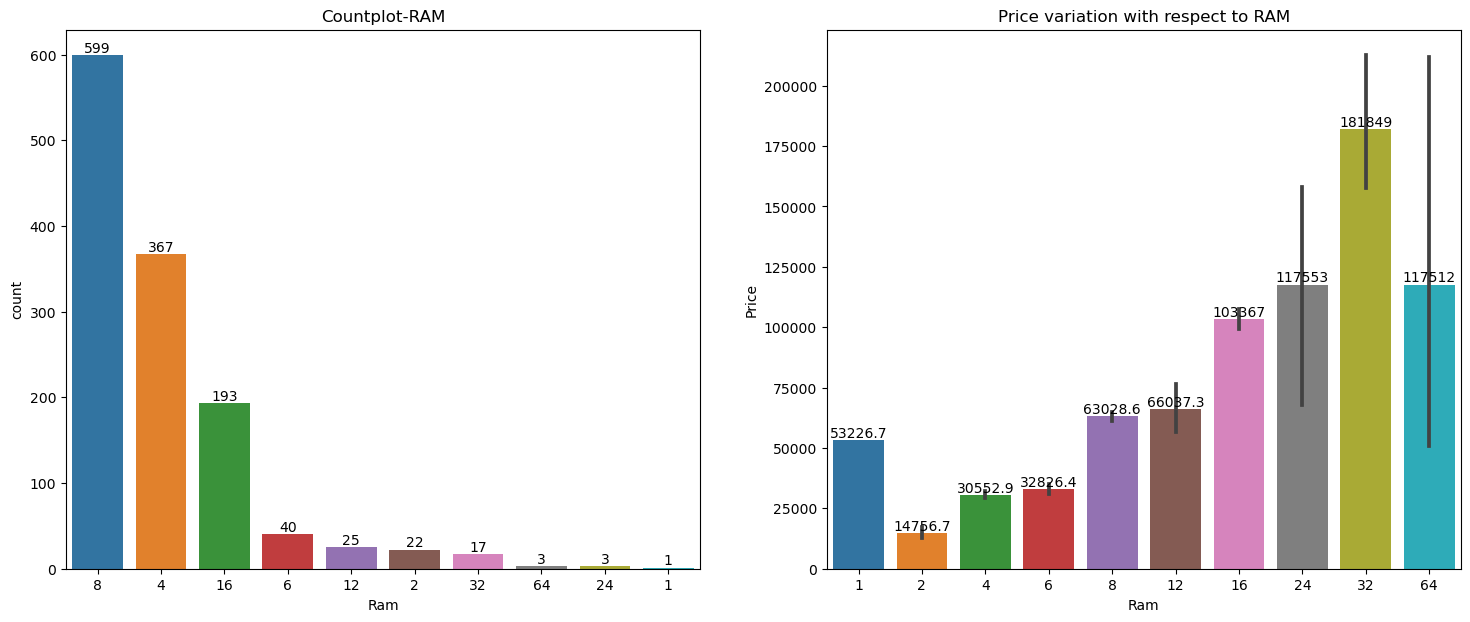

In [ ]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.title('Countplot-RAM')
ax=sns.countplot(x ='Ram', data = df1, order = df1['Ram'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.subplot(1,2,2)
plt.title('Price variation with respect to RAM')
ax=sns.barplot(x = df_filtered['Ram'],y = df_filtered['Price'])
ax.bar_label(ax.containers[0])

# **Memory column**

#### memory column is again a noisy column that gives an understanding of hard drives. many laptops came with HHD and SSD both, as well in some there is an external slot present to insert after purchase. This column can disturb our analysis if not feature engineer it properly. So If we use value counts on a column then we are having 4 different categories of memory as HHD, SSD, Flash storage, and hybrid.

In [ ]:
df1['Memory'].value_counts()  #We have different categories and also different kinds of variations

Memory
256GB SSD                        399
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

### In here, we will do as follows,

### Four most common variants observed: HDD, SSD, Flash, Hybrid
### We will remove decimal space for example 1.0 TB will become 1TB
### We will replace the word GB with ""
### We will replace the word TB with "000"
### We will split the word across the "+" character

In [ ]:
df1['Memory'] = df1['Memory'].astype(str).replace('\.0','',regex = True)
df1['Memory'] = df1['Memory'].str.replace('GB','')
df1['Memory'] = df1['Memory'].str.replace('TB','000')
newdf = df1['Memory'].str.split("+",n = 1,expand = True)
newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


#### We will strip up all the white spaces, basically eliminating white spaces

In [ ]:
df1['first'] = newdf[0]
df1['first'] = df1['first'].str.strip()
df1.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,cpu_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256 SSD
3,Apple,Ultrabook,14,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,256 SSD


# Creating Layer 1 column for each memory type¶

In [ ]:
def applychanges(value):

    df1['Layer1'+value] = df1['first'].apply(lambda x:1 if value in x else 0)


listtoapply = ['HDD','SSD','Hybrid','FlashStorage']
for value in listtoapply:
    applychanges(value)


df1.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,cpu_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,14,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,256 SSD,0,1,0,0


#### We will remove all the character and just keeping the numbers

In [ ]:
df1['first'] = df1['first'].str.extract('(\d+)')
df1.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,cpu_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,128,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,128,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256,0,1,0,0
3,Apple,Ultrabook,14,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,512,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,256,0,1,0,0


In [ ]:
df1['first'].value_counts()

first
256     493
1000    243
128     173
512     138
500     130
32       44
64       16
2000     16
16       10
180       4
240       1
8         1
508       1
Name: count, dtype: int64

In [ ]:
df1["second"]= newdf[1]
df1['second'] = df1['second'].str.strip()
df1.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,cpu_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,128,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,14,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,256,0,1,0,0,None


# Creating Layer 2 column for each memory type

In [ ]:
def applychanges1(value):

    df1['Layer2'+value] = df1['second'].apply(lambda x:1 if value in x else 0)


listtoapply1 = ['HDD','SSD','Hybrid','FlashStorage']
df1['second'] = df1['second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)

In [ ]:
df1['second'] = df1['second'].str.extract('(\d+)')
df1.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,14,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


In [ ]:
df1['second'].value_counts()

second
0       1066
1000     183
2000      15
256        3
500        2
512        1
Name: count, dtype: int64

#### We will remove all the characters and just keeping the numbers again

In [ ]:
df1['first'] = df1['first'].astype('int')
df1['second'] = df1['second'].astype('int')
df1.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,14,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


### Multiplying the elements and storing in subsequent columns

In [ ]:
df1["HDD"]=(df1["first"]*df1["Layer1HDD"]+df1["second"]*df1["Layer2HDD"])
df1["SSD"]=(df1["first"]*df1["Layer1SSD"]+df1["second"]*df1["Layer2SSD"])
df1["Hybrid"]=(df1["first"]*df1["Layer1Hybrid"]+df1["second"]*df1["Layer2Hybrid"])
df1["Flash_Storage"]=(df1["first"]*df1["Layer1FlashStorage"]+df1["second"]*df1["Layer2FlashStorage"])

### Dropping unecessary columns

In [ ]:
df1.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage'],inplace=True)

In [ ]:
df1.drop(columns=['Memory'],inplace=True)
df1.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,cpu_name,HDD,SSD,Hybrid,Flash_Storage
279,Lenovo,Notebook,8,Nvidia GeForce MX150,No OS,2.80,45234.7200,0,0,127.335680,Intel Core i7,2000,0,0,0
685,Dell,Gaming,14,Nvidia GeForce GTX 1070,Windows 10,3.49,149916.6000,0,0,141.211995,Intel Core i7,1000,256,0,0
288,Lenovo,Gaming,14,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,62817.1200,0,1,141.211995,Intel Core i7,1000,256,0,0
289,Lenovo,Notebook,8,Nvidia GeForce 940MX,No OS,2.20,35112.0528,0,0,141.211995,Intel Core i7,1000,0,0,0
930,Lenovo,Notebook,4,Intel HD Graphics 505,Windows 10,2.20,16463.5200,0,0,100.454667,Other Intel Processor,1000,0,0,0


In [ ]:
df1.columns

Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'TouchScreen', 'IPS', 'ppi', 'cpu_name', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

In [ ]:
df1.corr(numeric_only=True)['Price']

Ram              0.717141
Weight           0.151431
Price            1.000000
TouchScreen      0.190070
IPS              0.256502
ppi              0.477386
HDD             -0.094097
SSD              0.669050
Hybrid           0.008035
Flash_Storage         NaN
Name: Price, dtype: float64

#### Based on the correlation we observe that Hybrid and Flash Storage are almost negligible,so we can simply drop them off,where as HDD and SDD are having good correlation,we find that HDD has -ve relation with Price,and that's true,if the price of laptop is increasing there is more probability that the laptop is gonna use SDD instead of HDD and vice versa as well

In [ ]:
df1.drop(columns = ['Hybrid','Flash_Storage'],inplace=True,axis=1)
df1.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,cpu_name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256
3,Apple,Ultrabook,14,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256


# **Analysis on GPU column**

In [ ]:
df1['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      65
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

#### Here as we are having less data regarding the laptops,its better that we focus on GPU brands instead focusing on the values which are present there beside them,we will focus on the brands

# Extracting the GPU brands

In [ ]:
# Which brand GPU is in laptop
df1['Gpu_brand'] = df1['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
Gpu_brand=df1['Gpu_brand'].value_counts()

[Text(0, 0, '702'), Text(0, 0, '392'), Text(0, 0, '175'), Text(0, 0, '1')]

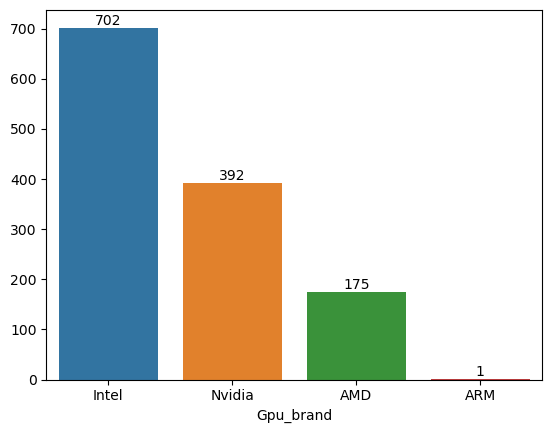

In [ ]:
ax=sns.barplot(x=Gpu_brand.index,y=Gpu_brand.values)
ax.bar_label(ax.containers[0])

#### Removing ARM Tuple

In [ ]:
df1 = df1[df1['Gpu_brand'] != 'ARM']
Gpu_brand1=df1['Gpu_brand'].value_counts()

#### we have handled the outliers, but sometimes it may have great impact on the target analysis. So I used np.median to check if there is any impact or not

[Text(0, 0, '47978.6'), Text(0, 0, '35324.6'), Text(0, 0, '64122.5')]

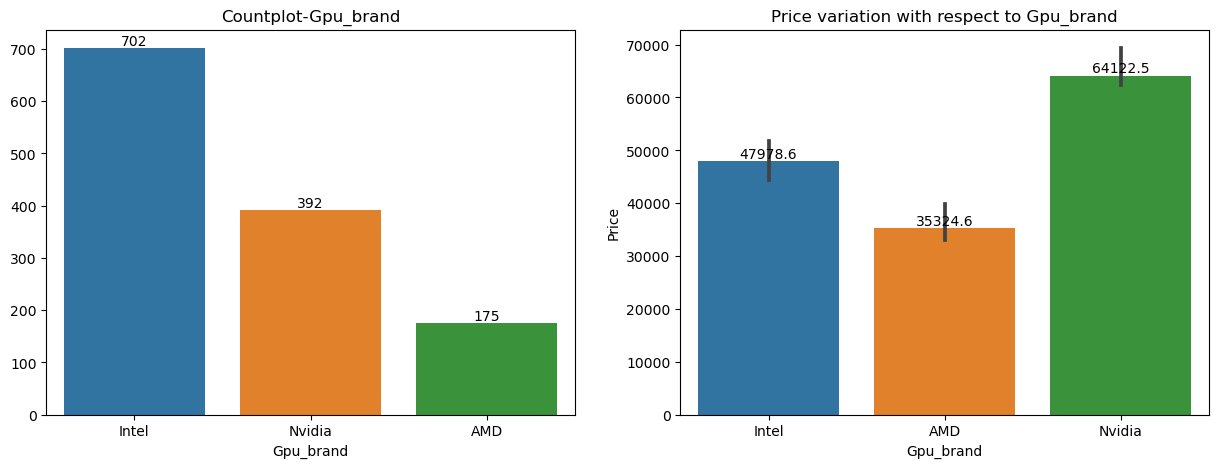

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Countplot-Gpu_brand')
ax=sns.barplot(x=Gpu_brand1.index,y=Gpu_brand1.values)
ax.bar_label(ax.containers[0])
plt.subplot(1,2,2)
plt.title('Price variation with respect to Gpu_brand')
# np.median is used to check if there is any impact a great impact on the target analysis
ax=sns.barplot(x=df1['Gpu_brand'],y=df1['Price'],estimator=np.median)
ax.bar_label(ax.containers[0])

#### Thankfully, there is no much of impact on the target variable. Next we can safely drop the old GPU column

In [ ]:
df1 = df1.drop(columns=['Gpu'])
df1.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,cpu_name,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,14,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256,Intel


# Operating System analysis

In [ ]:
df1['OpSys'].value_counts()

OpSys
Windows 10      1044
No OS             63
Linux             61
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

# Barplot - Price variation on OS in laptops

[Text(0, 0, '93220.3'),
 Text(0, 0, '31892.9'),
 Text(0, 0, '62136'),
 Text(0, 0, '67285.8'),
 Text(0, 0, '32919.4'),
 Text(0, 0, '68543.7'),
 Text(0, 0, '29279'),
 Text(0, 0, '89864.8'),
 Text(0, 0, '29250.7')]

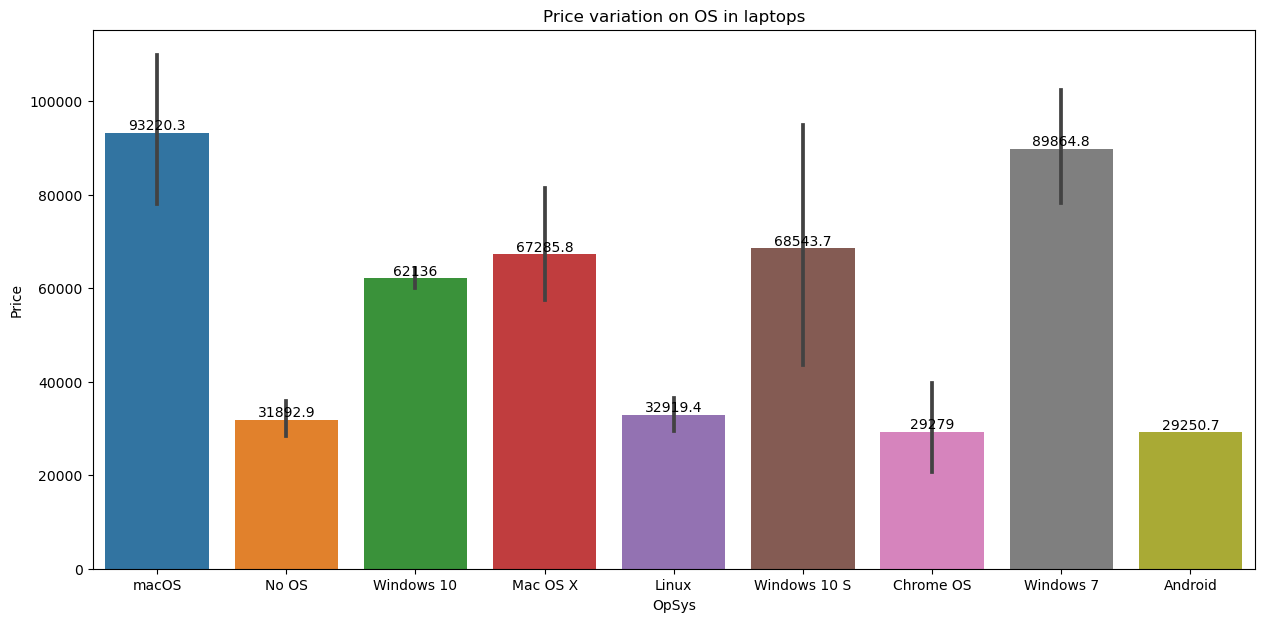

In [ ]:
plt.figure(figsize=(15,7))
plt.title ('Price variation on OS in laptops')
ax=sns.barplot(x = df1['OpSys'],y = df_filtered['Price'],)
ax.bar_label(ax.containers[0])

In [ ]:
df1['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

#### We can see that there are many versions of one type of OS, espicially for Windows and macOS. So we can club them together like,
#### club {Windows 10,Windows 7,Windows 7 S}-->Windows
#### club {Windows 10,Windows 7,Windows 7 S}-->Windows
#### club {macOS,mac OS X}--> mac¶
#### others --> others

In [ ]:
def setcategory(text):

    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'

    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'

    else:
        return 'Other'

df1['OpSys'] = df1['OpSys'].apply(lambda x:setcategory(x))

df1.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,cpu_name,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,14,Mac,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256,Intel


In [ ]:
OpSys=df1['OpSys'].value_counts()

# Countplot for OS types
# Barplot - Price variation on OS types

[Text(0, 0, '83340.5'), Text(0, 0, '31840'), Text(0, 0, '63320.2')]

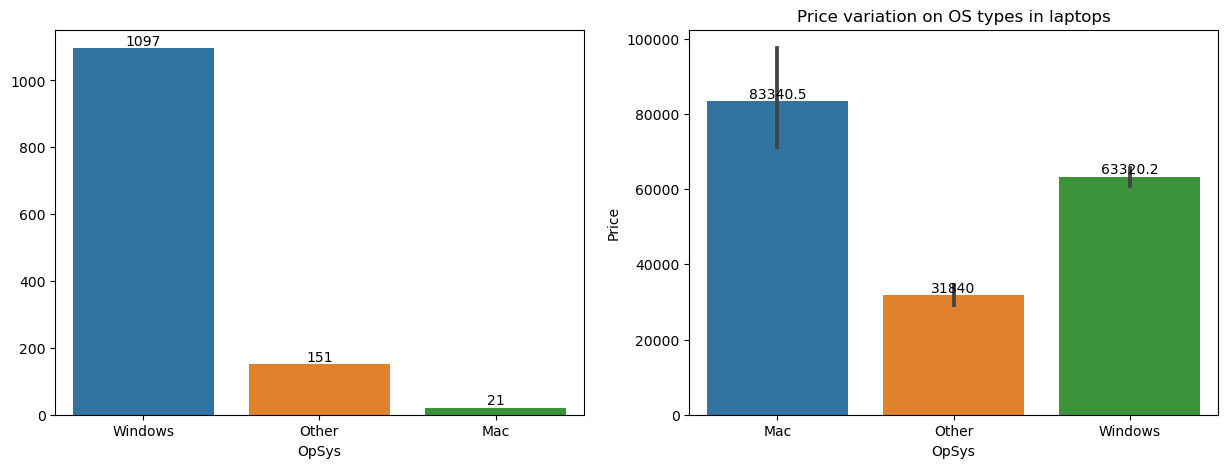

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax=sns.barplot(x=OpSys.index,y=OpSys.values,data=df_filtered)
ax.bar_label(ax.containers[0])
plt.subplot(1,2,2)
plt.title ('Price variation on OS types in laptops')
ax=sns.barplot(x = df1['OpSys'],y = df1['Price'],)
ax.bar_label(ax.containers[0])

# Weight analysis

#### Distribution plot on weight column

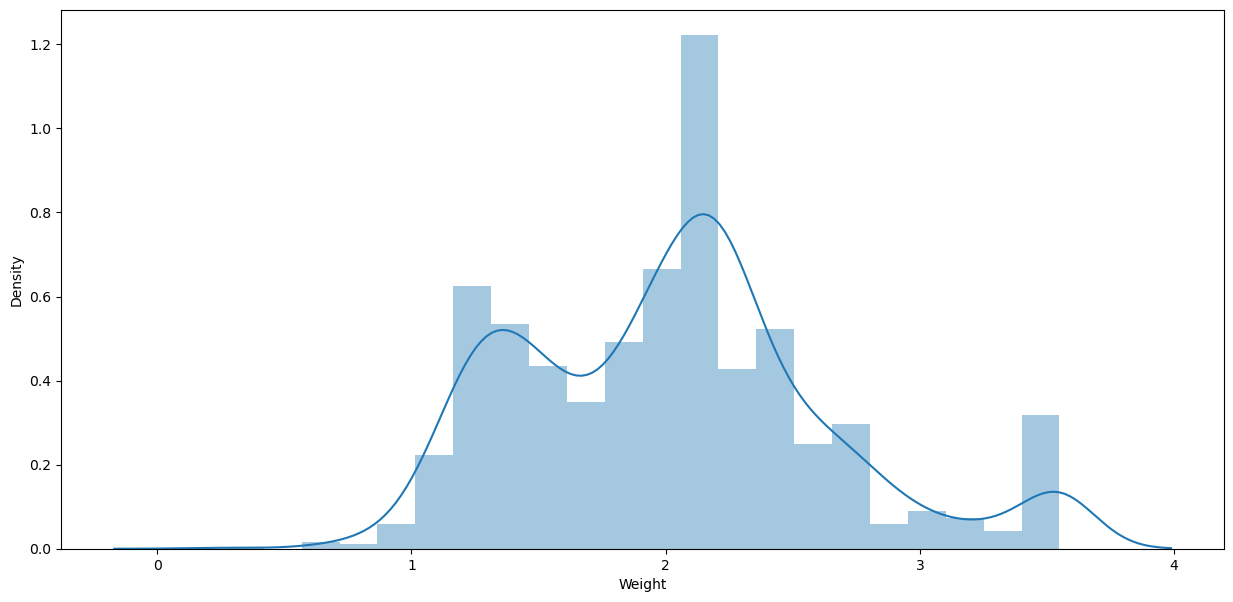

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(df1['Weight'])
plt.show()

# Scatterplot - Price variation on weight

<Axes: xlabel='Weight', ylabel='Price'>

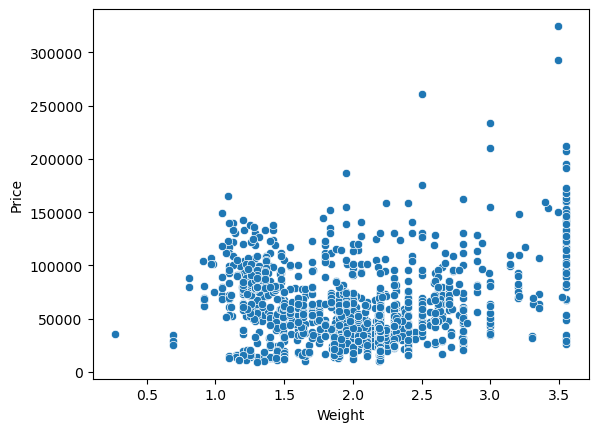

In [ ]:
sns.scatterplot(x = df1['Weight'],y = df1['Price'])

# Price Analysis

#### Distribution plot for Price column

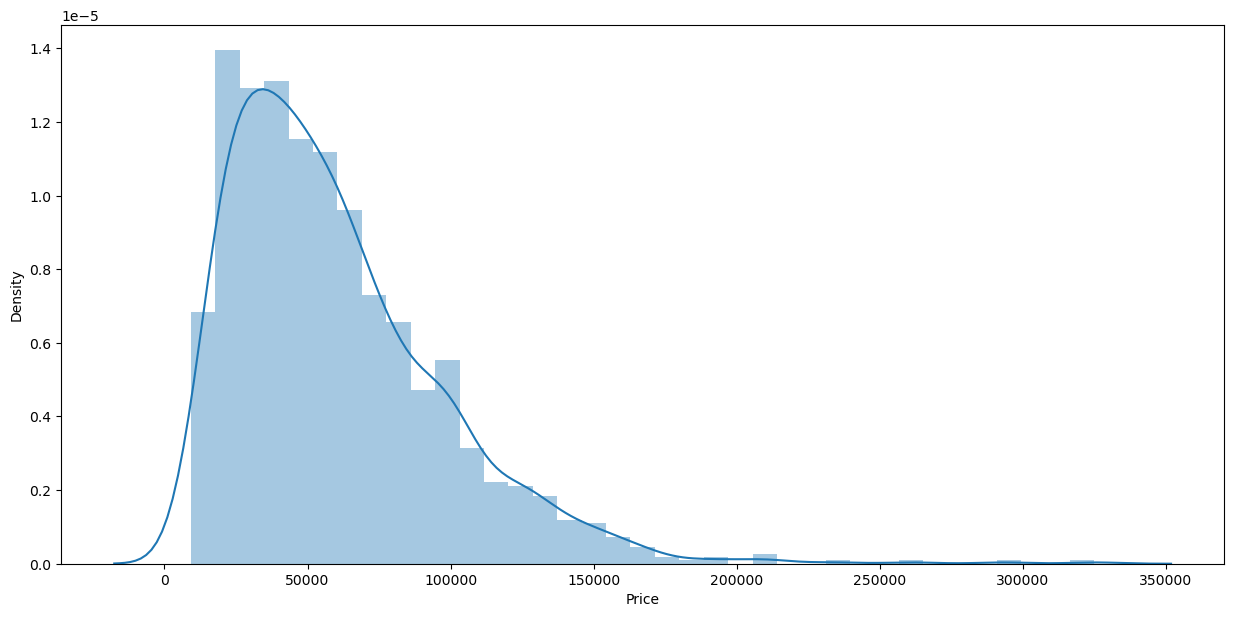

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(df1['Price'])
plt.show()

#### np.log is applied to the Price column to get a Gaussian distribution

### Log transformation uses a logarithmic function to apply non-linear scaling to the data. It reduces the impact of skewness in the data distribution which contains highly skewed data.

# **6-properties of Normal distribution **

*   It is Bell Shaped
*   It is symmetrical
*   It is unimodal
*   68% of the data falls with in -1 STD TO +1 STD from the mean
*   95% of the data falls with in -2 STD TO +2 STD from the mean
*   99.7% of the data falls with in -3 STD TO +3 STD from the mean






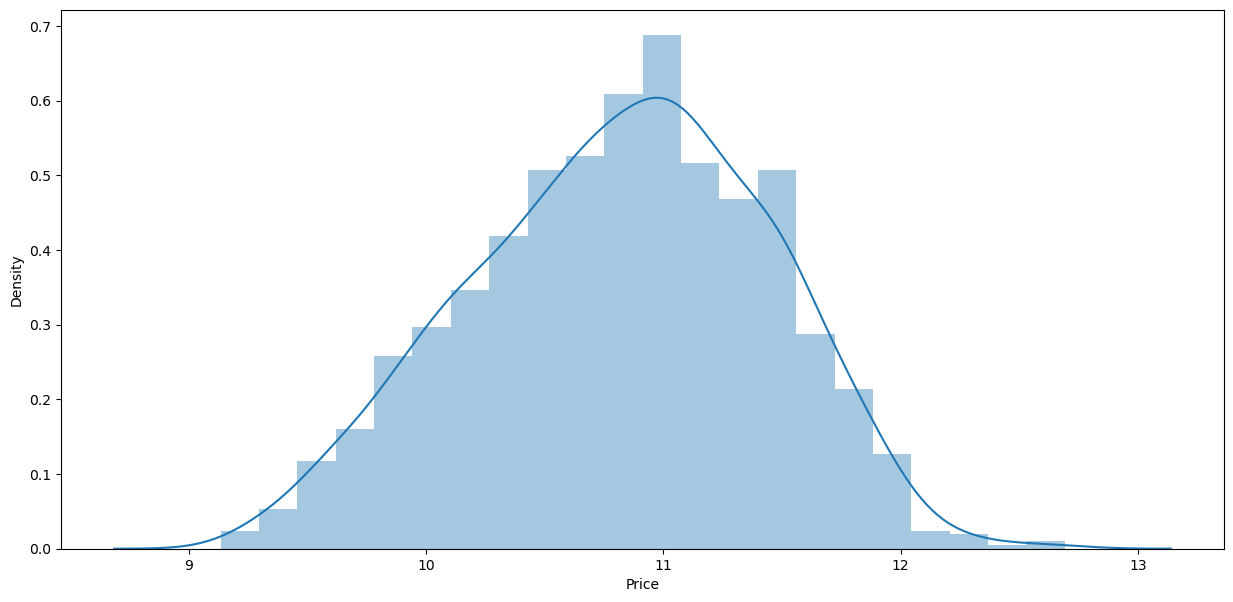

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(np.log(df1['Price']))
plt.show()

In [ ]:
df1.corr(numeric_only=True)['Price']

Ram            0.717032
Weight         0.150827
Price          1.000000
TouchScreen    0.191814
IPS            0.257638
ppi            0.479338
HDD           -0.094558
SSD            0.668906
Name: Price, dtype: float64

# Heatmap - Correlation for each features

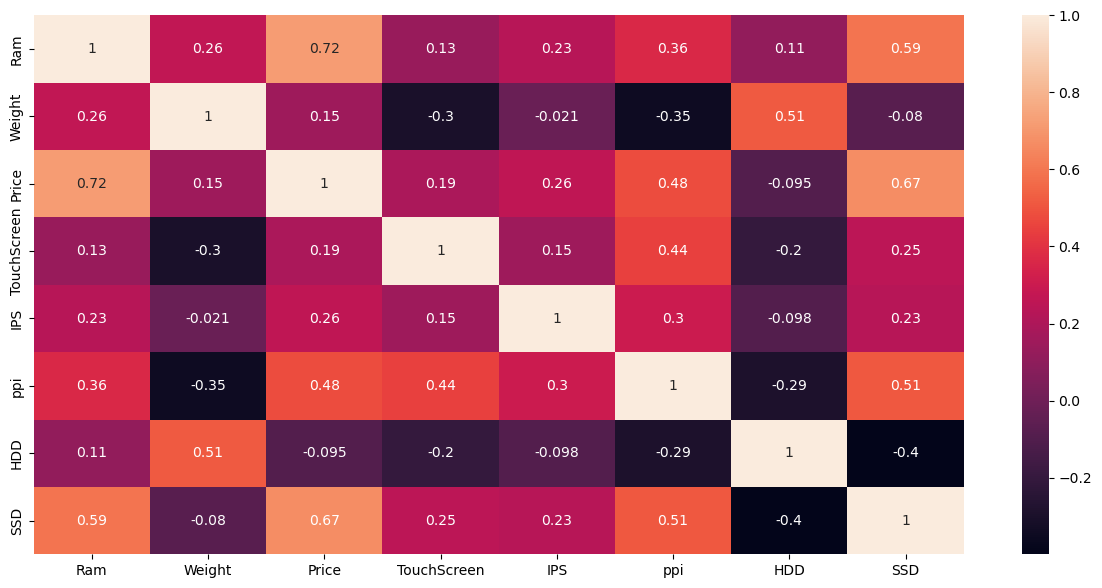

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(numeric_only=True),annot=True)
plt.show()

In [ ]:
print('Number of duplicated values in training dataset: ',df1.duplicated().sum())

Number of duplicated values in training dataset:  30


In [ ]:
df2=df1.copy()

In [ ]:
df2.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


In [ ]:
df2.head(1)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,cpu_name,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,Intel


#**Encoding - catagorical column with onehotencoder**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore',sparse_output =False).set_output(transform='pandas')
ohetransform=ohe.fit_transform(df2[['Company','TypeName','OpSys','cpu_name','Gpu_brand']])
ohetransform

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,...,OpSys_Other,OpSys_Windows,cpu_name_AMD Processor,cpu_name_Intel Core i3,cpu_name_Intel Core i5,cpu_name_Intel Core i7,cpu_name_Other Intel Processor,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


**concatinating the encoding catagoricl columns to the dataframe with numerical columns**

In [ ]:
df2=pd.concat([df2,ohetransform],axis=1).drop(columns=['Company','TypeName','OpSys','cpu_name','Gpu_brand'])

In [ ]:
df2.head(2)

,Ram,Weight,Price,TouchScreen,IPS,ppi,HDD,SSD,Company_Acer,Company_Apple,...,OpSys_Other,OpSys_Windows,cpu_name_AMD Processor,cpu_name_Intel Core i3,cpu_name_Intel Core i5,cpu_name_Intel Core i7,cpu_name_Other Intel Processor,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia
0,8,1.37,71378.6832,0,1,226.983001,0,128,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,8,1.34,47895.5232,0,0,127.677938,0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# **Splitting the training data and testing data**

In [ ]:
X=df2.drop(['Price'],axis = 1) # except dependent(target) variable, rest of the independent variables are in the train
y=np.log(df2['Price']) # log transformed dependent variable only in the test

In [ ]:
X.head()

,Ram,Weight,TouchScreen,IPS,ppi,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,...,OpSys_Other,OpSys_Windows,cpu_name_AMD Processor,cpu_name_Intel Core i3,cpu_name_Intel Core i5,cpu_name_Intel Core i7,cpu_name_Other Intel Processor,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia
0,8,1.37,0,1,226.983001,0,128,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,8,1.34,0,0,127.677938,0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,8,1.86,0,0,141.211995,0,256,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,14,1.83,0,1,220.534629,0,512,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,8,1.37,0,1,226.983001,0,256,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


**75% of the data for training and 25% of the data for testing**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.25,random_state=42)

X_train.shape,X_test.shape

((929, 43), (310, 43))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('X_train', StandardScaler(), ['Ram','Weight','SSD'])], remainder ='passthrough')

X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

In [ ]:
X_test_scaled

array([[ 0.0362879 , -0.71304577,  0.38298223, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.0362879 ,  0.00857025,  0.38298223, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.79514642, -1.03376413,  1.76611965, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.13628446, -2.172314  , -1.00015519, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.79514642,  0.08874974, -0.30858648, ...,  0.        ,
         0.        ,  1.        ],
       [-1.13628446, -0.29611202,  0.38298223, ...,  0.        ,
         1.        ,  0.        ]])

# Model Building

# Linear Regression:

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

lrmodel=LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression()

 # **Metrics -  To determine the perfomance of our ML MODEL**
 # R-squared - measure the proportion of the varience in the dependent variable that is predictable from the independent variable(R-squared:1 - best; R-squared -eg 0.2 -not sufficient data)
 # adjusted R-squared - modified version of R-squared that adjust the number of independent variables. It penalizes the inclusion of unnessary variables

 # Loss function - squared difference between the actual value and predicted value
 # cost function - Calculating the average of all the loss is the cost function(add all losses/total no. of losses)
 # Three types of cost function

*   Mean Squared Error(MSE) # average of squared differences between predicted and actual values - sensitive to outliers
*   Mean Absolute Error(MAE) # average of absolute difference between predicted and actual values. More interpretable metric compared to MSE - not sensitive to the scale of the data
*   Root Mean squared Error(RMSE) # square root of the MSE - retains same scale as the dependent variable and penalizes large errors
# Cross Validation Score - to evaluate the performance of a ML MODEL





In [ ]:
from sklearn import metrics
print(f"Linear Regression:")
print(lrmodel.score(X_train,y_train))
print(lrmodel.score(X_test,y_test))
print(cross_val_score(lrmodel,X,y,cv=5,).mean())
ypred=lrmodel.predict(X_test)
print('MAE',metrics.mean_absolute_error(y_test,ypred))
print('MSE',metrics.mean_squared_error(y_test,ypred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,ypred)))


Linear Regression:
0.8276548656433543
0.8220515848849038
0.7865420765646952
MAE 0.20227813510041964
MSE 0.06526265519430387
RMSE 0.2554655655745092


# GradientBoostingRegressor

In [ ]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(X_train,y_train)
ypredtrain3=gbmodel.predict(X_train)
ypredtest3=gbmodel.predict(X_test)
print(f"GradientBoostingRegressor:")
print('Train_accuracy',r2_score(y_train,ypredtrain3))
print('Test_accuracy',r2_score(y_test,ypredtest3))
print('cross_val_score',cross_val_score(gbmodel,X,y,cv=5,).mean())
print('MAE',metrics.mean_absolute_error(y_test,ypredtest3))
print('MSE',metrics.mean_squared_error(y_test,ypredtest3))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,ypredtest3)))


GradientBoostingRegressor:
Train_accuracy 0.9088523039742874
Test_accuracy 0.8704618607599718
cross_val_score 0.8467704738096998
MAE 0.16705879258910009
MSE 0.047508166399041415
RMSE 0.21796368137614444


# XGBRegressor

In [ ]:
xgmodel=XGBRegressor()
xgmodel.fit(X_train,y_train)
ypredtrain4=xgmodel.predict(X_train)
ypredtest4=xgmodel.predict(X_test)
print(f"XGBRegressor:")
print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(xgmodel,X,y,cv=5,).mean())
print('MAE',metrics.mean_absolute_error(y_test,ypredtest4))
print('MSE',metrics.mean_squared_error(y_test,ypredtest4))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,ypredtest4)))



XGBRegressor:
0.9906312898316302
0.886220376577005
0.8584311340974937
MAE 0.1505450409719792
MSE 0.04172872417430548
RMSE 0.20427609790258253


# RandomForestRegressor

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(X_train,y_train)
ypredtrain2=rfmodel.predict(X_train)
ypredtest2=rfmodel.predict(X_test)
print(f"RandomForestRegressor:")
print(r2_score(y_train,ypredtrain2))
print(r2_score(y_test,ypredtest2))
print(cross_val_score(rfmodel,X,y,cv=5,).mean())
print('MAE',metrics.mean_absolute_error(y_test,ypredtest2))
print('MSE',metrics.mean_squared_error(y_test,ypredtest2))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,ypredtest2)))

#scores=f'''
#{'Metrics'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
#{'r2score'.ljust(10)}{r2_score(y_train,ypredtrain2)}\t{r2_score(y_test,ypredtest2)}
#{'MSE'.ljust(10)}{mse(y_train,ypredtrain2)}\t{mse(y_test,ypredtest2)}
#'''

RandomForestRegressor:
0.9784026456988059
0.8702656974253195
0.8468318155353671
MAE 0.1614973850433827
MSE 0.04758010938354565
RMSE 0.21812865328412415


# HYPERPARAMETER TUNING FOR RANDOMFOREST

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
#{'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 #'max_features': ['auto', 'sqrt'],
 #'min_samples_leaf': [1, 2, 4],
 #'min_samples_split': [2, 5, 10],
 #'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [ ]:
def evaluate(model, X_train, y_train):
    predictions = model.predict(X_train)
    errors = abs(predictions - y_train)
    mape = 100 * np.mean(errors / y_train)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_train, y_train)

Model Performance
Average Error: 0.0729 degrees.
Accuracy = 99.33%.


In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_train, y_train)

Model Performance
Average Error: 0.0728 degrees.
Accuracy = 99.33%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.00%.


# **Conculsion**

# Out of all the models XGBoost model and Random forest model after hyperparameter tunning is giving the highest accuracy this means predictions made by this model are close to the real values as compared to the other model.#

In [ ]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats

NameError: name 'grid' is not defined

#**features have the most significant impact on laptop prices**

In [ ]:
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
Ram,0.227665
ppi,0.016892
SSD,0.048717
Company_Acer,0.010150
Company_HP,0.017509
TypeName_Notebook,0.103259
TypeName_Ultrabook,0.018086
TypeName_Workstation,0.015121
OpSys_Other,0.024181
cpu_name_AMD Processor,0.012668


# Exporting the model

In [ ]:
import pickle

pickle.dump(df1,open('df.pkl','wb'))
pickle.dump(random_accuracy,open('laptop_price.pkl','wb'))

In [ ]:
df1.to_csv('df.csv',index=None)

#**app.py**

In [ ]:
import streamlit as st
import pickle
import numpy as np
import pandas as pd
#load the model and dataframe
df = pd.read_csv("df.csv")
random_accuracy = pickle.load(open("laptop_price.pkl", "rb"))
st.title("Laptop Price Predictor")
#Now we will take user input one by one as per our dataframe
#Brand
#company = st.selectbox('Brand', df['Company'].unique())
company = st.selectbox('Brand', df['Company'].unique())
#Type of laptop
lap_type = st.selectbox("Type", df['TypeName'].unique())
#Ram
ram = st.selectbox("Ram(in GB)", [2,4,6,8,12,16,24,32,64])
#weight
weight = st.number_input("Weight of the Laptop")
#Touch screen
touchscreen = st.selectbox("TouchScreen", ['No', 'Yes'])
#IPS
ips = st.selectbox("IPS", ['No', 'Yes'])
#screen size
screen_size = st.number_input('Screen Size')
# resolution
resolution = st.selectbox('Screen Resolution',['1920x1080','1366x768','1600x900','3840x2160','3200x1800','2880x1800','2560x1600','2560x1440','2304x1440'])
#cpu
cpu = st.selectbox('CPU',df['cpu_name'].unique())
hdd = st.selectbox('HDD(in GB)',[0,128,256,512,1024,2048])
ssd = st.selectbox('SSD(in GB)',[0,8,128,256,512,1024])
gpu = st.selectbox('GPU',df['Gpu_brand'].unique())
os = st.selectbox('OS',df['OpSys'].unique())
#Prediction
if st.button('Predict Price'):
    ppi = None
    if touchscreen == "Yes":
        touchscreen = 1
    else:
        touchscreen = 0
    if ips == "Yes":
        ips = 1
    else:
        ips = 0
    X_res = int(resolution.split('x')[0])
    Y_res = int(resolution.split('x')[1])
    ppi = ((X_res ** 2) + (Y_res**2)) ** 0.5 / screen_size
    query = np.array([company,lap_type,ram,weight,touchscreen,ips,ppi,cpu,hdd,ssd,gpu,os])
    query = query.reshape(1, 12)
    prediction = str(int(np.exp(random_accuracy.predict(query)[0])))
    st.title("The predicted price of this configuration is " + prediction)

2024-03-29 10:59:10.334 
  command:

    streamlit run C:\Users\Elite001\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


#Importing Libraries
import streamlit as st
import pickle
import numpy as np

st.set_page_config(page_title="Laptop Price Predictor", page_icon="💻",
                   layout="wide")

#import model
st.title("Laptop Price Predictor 💻")
model=pickle.load(open("laptop.pkl","rb"))
df=pickle.load(open("df.pkl","rb"))

# making 3 cols left_column, middle_column, right_column
left_column, middle_column, right_column = st.columns(3)
with left_column:
    # brand input
    company = st.selectbox("Brand", df["Company"].unique())

with middle_column:
    # laptop type
    typename = st.selectbox("Type", df["TypeName"].unique())

with right_column:
    # Ram size
    ram = st.selectbox("Ram (in GB)", df["Ram"].unique())

# making 3 cols left_column, middle_column, right_column
left_column, middle_column, right_column = st.columns(3)
with left_column:
    # Weight input
    weight = st.number_input("Weight of laptop in kg")

with middle_column:
    # Touchscreen
    touchscreen = st.selectbox("Touchscreen", ["No", "Yes"])

with right_column:
    # IPS display
    ips = st.selectbox("IPS Display", ["No", "Yes"])

# making 3 cols left_column, middle_column, right_column
left_column, middle_column, right_column = st.columns(3)
with left_column:
    # screen size
    Screen_size = st.number_input("Screen Size (in Inches)")

with middle_column:
    # resolution
  resolution = st.selectbox('Screen Resolution',['1920x1080', '1366x768', '1600x900', '3840x2160', '3200x1800', '2880x1800', '2560x1600','2560x1440', '2304x1440'])
with right_column:
    # cpu input
    cpu = st.selectbox("CPU Brand", df["cpu_name"].unique())

# making 3 cols left_column, middle_column, right_column
left_column,  right_column = st.columns(2)
with left_column:
    # hdd input
    hdd = st.selectbox("HDD(in GB)", [0, 128, 256, 512, 1024, 2048])


with right_column:
    # ssd input
    ssd = st.selectbox("SSD(in GB)", [0, 8, 128, 256, 512, 1024])

#gpu input
gpu=st.selectbox("GPU Brand",df["Gpu_brand"].unique())

#os input
os=st.selectbox("OS Type",df["OpSys"].unique())

if st.button("Pridict Price"):
    ppi = None
    if touchscreen=="Yes":
        touchscreen=1
    else:
        touchscreen=0

    if ips == "Yes":
        ips=1
    else:
        ips=0

    X_res=int(resolution.split("x")[0])
    Y_res=int(resolution.split('x')[1])
    ppi=((X_res ** 2)+(Y_res ** 2))**0.5/Screen_size
    query=np.array([company, typename, ram, weight, touchscreen, ips, ppi, cpu, hdd, ssd, gpu, os])

    query=query.reshape(1, 12)
    st.title("The Predicted Price of Laptop = Rs "+str(int(np.exp(model.predict(query)[0]))))

In [ ]:
pip install streamlit

# **3lines of code to access streamlit webapp**

In [ ]:
! pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.197.104.62


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.197.104.62:8501

npx: installed 22 in 3.579s
  Stopping...
^C
